In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

!pip install openpyxl

-> Read the data

In [2]:
reviews_df_unlceaned = pd.read_csv("reviews.csv")
reviews_df_unlceaned

,index,reviews,sentiment
0,1,Absolutely breathtaking views and fantastic sk...,positive
1,2,"The lodge was cozy, and the staff was incredib...",positive
2,3,"Mountain biking trails were well-maintained, a...",positive
3,4,Loved the guided nature walk. Learned so much ...,positive
4,5,"The zip-lining course was thrilling, and the i...",positive
...,...,...,...
520,521,"The rental cabins were cozy and comfortable, b...",NaN
521,522,The outdoor climbing routes were challenging a...,NaN
522,523,The whitewater rafting was an adrenaline-pumpi...,NaN
523,524,"The mountain views were stunning, but the crow...",NaN


-> Make everything lowercase and get the reviews df

In [3]:
# get the sentiment column
sentiment_col = reviews_df_unlceaned["sentiment"]

# make the reviews column lowercase
reviews_df_uncleaned = reviews_df_unlceaned[["reviews"]]
reviews_lowercase = reviews_df_uncleaned['reviews'].str.lower()

# put it together
reviews_df = reviews_lowercase.to_frame(name='reviews')
reviews_df["sentiment"] = sentiment_col
reviews_df

,reviews,sentiment
0,absolutely breathtaking views and fantastic sk...,positive
1,"the lodge was cozy, and the staff was incredib...",positive
2,"mountain biking trails were well-maintained, a...",positive
3,loved the guided nature walk. learned so much ...,positive
4,"the zip-lining course was thrilling, and the i...",positive
...,...,...
520,"the rental cabins were cozy and comfortable, b...",NaN
521,the outdoor climbing routes were challenging a...,NaN
522,the whitewater rafting was an adrenaline-pumpi...,NaN
523,"the mountain views were stunning, but the crow...",NaN


In [4]:
reviews_df.describe()

,reviews,sentiment
count,525,100
unique,312,3
top,the food options were limited and overpriced. ...,positive
freq,10,52


-> Get the populated data

In [5]:
reviews_populated_df = reviews_df[:100]
reviews_populated_df

,reviews,sentiment
0,absolutely breathtaking views and fantastic sk...,positive
1,"the lodge was cozy, and the staff was incredib...",positive
2,"mountain biking trails were well-maintained, a...",positive
3,loved the guided nature walk. learned so much ...,positive
4,"the zip-lining course was thrilling, and the i...",positive
...,...,...
95,peak mountain resort is worth every penny! fro...,positive
96,absolutely breathtaking views and fantastic sk...,positive
97,"the resort is beautiful, but the lift lines we...",neutral
98,loved the cozy ski-in/ski-out accommodations! ...,positive


-> Get bow representation of populated data

In [6]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()

# use populated data (golden rule)
reviews_populated_bow = vectorizer.fit_transform(reviews_populated_df['reviews'])
reviews_populated_bow_df = pd.DataFrame(reviews_populated_bow.toarray(), columns=vectorizer.get_feature_names_out())

reviews_populated_bow_df

,about,above,absolute,absolutely,accidents,accommodations,action,active,activities,added,...,will,winter,wish,with,worth,would,year,years,you,zip
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


-> Choose the model and hyperparameter and check cross val scores

In [7]:
# get X and y
X = reviews_populated_bow_df
y = reviews_populated_df["sentiment"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# cross validate model
model = SVC(kernel = 'linear', class_weight="balanced")
cv_scores = cross_validate(model, X_train, y_train, cv=6, return_train_score = True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.022666,0.008965,0.846154,1.0
1,0.010025,0.008000,0.769231,1.0
2,0.010000,0.007579,0.923077,1.0
3,0.011020,0.006980,0.666667,1.0
4,0.010184,0.008156,0.833333,1.0
5,0.009751,0.007243,0.750000,1.0


-> Fit the model on the populated dataset, and predict on the rest

In [8]:
# get bag of words for all reviews
vectorizer2 = sklearn.feature_extraction.text.CountVectorizer()
reviews_all_bow = vectorizer2.fit_transform(reviews_df['reviews'])
reviews_all_bow_df = pd.DataFrame(reviews_all_bow.toarray(), columns=vectorizer2.get_feature_names_out())

# slice out the rows with missing targets
reviews_missing_bow_df = reviews_all_bow_df[100:]

# select only features that we trained our model on
features = vectorizer.get_feature_names_out()
missing_X = reviews_missing_bow_df[features]

# fit the model on populated data and predict on data with missing targets
model.fit(X,y)
sentiments_predicted = model.predict(missing_X)

sentiments_predicted.size

425

-> Stitch together the populated and predicted sentiment values to get the full reviews df

In [9]:
# create array of all sentiments
sentiments_populated = reviews_df["sentiment"][:100]
sentiments_all = np.append(sentiments_populated, sentiments_predicted)
sentiments_all.size

525

In [10]:
# replace current sentiments column
reviews_df.drop(columns=["sentiment"])
reviews_df['sentiment'] = sentiments_all

reviews_df

,reviews,sentiment
0,absolutely breathtaking views and fantastic sk...,positive
1,"the lodge was cozy, and the staff was incredib...",positive
2,"mountain biking trails were well-maintained, a...",positive
3,loved the guided nature walk. learned so much ...,positive
4,"the zip-lining course was thrilling, and the i...",positive
...,...,...
520,"the rental cabins were cozy and comfortable, b...",neutral
521,the outdoor climbing routes were challenging a...,negative
522,the whitewater rafting was an adrenaline-pumpi...,positive
523,"the mountain views were stunning, but the crow...",neutral


In [11]:
# output excel file

reviews_df.to_excel("output.xlsx")

Answering the questions:
Infrastructure vs. Operations: Given tight budgets, where should the resort allocate resources first?

Options:


Winter Activities:

● Skiing & Snowboarding: Lift-accessed downhill skiing, terrain parks, and groomed runs.

● Cross-Country Skiing: Designated trails through forests and valleys for a quieter experience.

● Snowshoeing: Guided or self-guided exploration of snowy landscapes.

● Sledding & Tobogganing: Family-friendly downhill fun, with some locations offering night sledding.

● Ice Skating: Outdoor rinks for guests of all ages.

● Dog Sledding & Snowmobiling: Guided experiences for adventure seekers.

● Fat Biking: Biking on groomed snow trails, an emerging winter trend.


Summer Activities:

● Hiking & Trail Running: Extensive trails for all skill levels, from scenic nature walks to high-altitude trekking.

● Mountain Biking: Lift-served downhill bike parks and cross-country trail systems.

● Climbing & Bouldering: Outdoor climbing routes with guided instruction available.

● Via Ferrata: Fixed-cable climbing routes for thrill-seekers with built-in safety measures.

● Zip-Lining & Adventure Parks: High-altitude rope courses and zip-line experiences.

● Whitewater Rafting & Kayaking: Nearby mountain rivers offer guided rafting excursions.

● Paragliding & Hang Gliding: Tandem flights with professional instructors for panoramic mountain views.



Lodging & Guest Services:

● Ski-in/Ski-out Accommodations: On-mountain lodges, hotels, and rental cabins.

● Dining & Après-Ski Experiences: Mountain-view restaurants, casual cafés, and après-ski lounges.

● Wellness & Spa Services: Full-service spa with massages, thermal pools, and relaxation areas.

● Retail & Rental Shops: Outdoor gear, branded apparel, and adventure equipment rentals.


In [12]:
# Categories = Winter Activities, Summer Activities, Lodging, Guest Services
# List = Keywords for each column
winter_activities_keywords = ['ski', 'skiing', 'snowboarding', 'terrain park', 'groomed run', 'cross-country', 'winter', 'slope', 'snowshoeing', 'sled', 'sledding', 'toboganning', 'tobogan', 'ice skating', 'rink', 'dog sled', 'dog sledding', 'snowmobile', 'snowmobiling', 'fat bike', 'fat biking', 'groomed']
summer_activities_keywords = ['hiking', 'trail running', 'trail', 'nature walk', 'trekking', 'trek', 'mountain bike', 'mountain biking', 'bike park', 'climbing', 'bouldering', 'via ferrata', 'cable climbing', 'zip', 'adventure park', 'rope course', 'rafting', 'raft', 'whitewater', 'kayak', 'kayaking', 'river', 'paragliding', 'hang gliding', 'summer']
lodging_keywords = ['room', 'cabin', 'hotel', 'lodge', 'lodging', 'accomodation', 'inn', 'rental', 'ski-in', 'ski-out']
guest_services_keywords = ['equipment', 'gear', 'guide', 'dining', 'food', 'après-ski', 'restaurant', 'café', 'lounge', 'spa', 'massage', 'pool', 'shop', 'rental', 'apparel', 'meal', 'check-in', 'check-out', 'hospitality', 'staff', 'intstructor', 'front desk']

In [13]:
winter_negative = 0
winter_neutral = 0
winter_positive = 0

summer_negative = 0
summer_neutral = 0
summer_positive = 0

lodging_negative = 0
lodging_neutral = 0
lodging_positive = 0

guest_services_negative = 0
guest_services_neutral = 0
guest_services_positive = 0

In [14]:
for index, review in enumerate(reviews_df['reviews']):
    for word in winter_activities_keywords:
        if word in review:
            sentiment = reviews_df.loc[index, "sentiment"] 
            if sentiment == 'negative':
                winter_negative = winter_negative + 1
            if sentiment == 'neutral':
                winter_neutral = winter_neutral + 1
            if sentiment == 'positive':
                winter_positive = winter_positive + 1
            break
    for word in summer_activities_keywords:
        if word in review:
            sentiment = reviews_df.loc[index, "sentiment"] 
            if sentiment == 'negative':
                summer_negative = summer_negative + 1
            if sentiment == 'neutral':
                summer_neutral = summer_neutral + 1
            if sentiment == 'positive':
                summer_positive = summer_positive + 1
            break
    for word in lodging_keywords:
        if word in review:
            sentiment = reviews_df.loc[index, "sentiment"] 
            if sentiment == 'negative':
                lodging_negative = lodging_negative + 1
            if sentiment == 'neutral':
                lodging_neutral = lodging_neutral + 1
            if sentiment == 'positive':
                lodging_positive = lodging_positive + 1
            break
    for word in guest_services_keywords:
        if word in review:
            sentiment = reviews_df.loc[index, "sentiment"] 
            if sentiment == 'negative':
                guest_services_negative = guest_services_negative + 1
            if sentiment == 'neutral':
                guest_services_neutral = guest_services_neutral + 1
            if sentiment == 'positive':
                guest_services_positive = guest_services_positive + 1
            break

In [15]:
print("winter_negative:", winter_negative)
print("winter_neutral:", winter_neutral)
print("winter_positive:", winter_positive)

print("summer_negative:", summer_negative)
print("summer_neutral:", summer_neutral)
print("summer_positive:", summer_positive)

print("lodging_negative:", lodging_negative)
print("lodging_neutral:", lodging_neutral)
print("lodging_positive:", lodging_positive)

print("guest_services_negative:", guest_services_negative)
print("guest_services_neutral:", guest_services_neutral)
print("guest_services_positive:", guest_services_positive)

winter_negative: 35
winter_neutral: 24
winter_positive: 144
summer_negative: 24
summer_neutral: 32
summer_positive: 118
lodging_negative: 56
lodging_neutral: 22
lodging_positive: 35
guest_services_negative: 40
guest_services_neutral: 15
guest_services_positive: 190


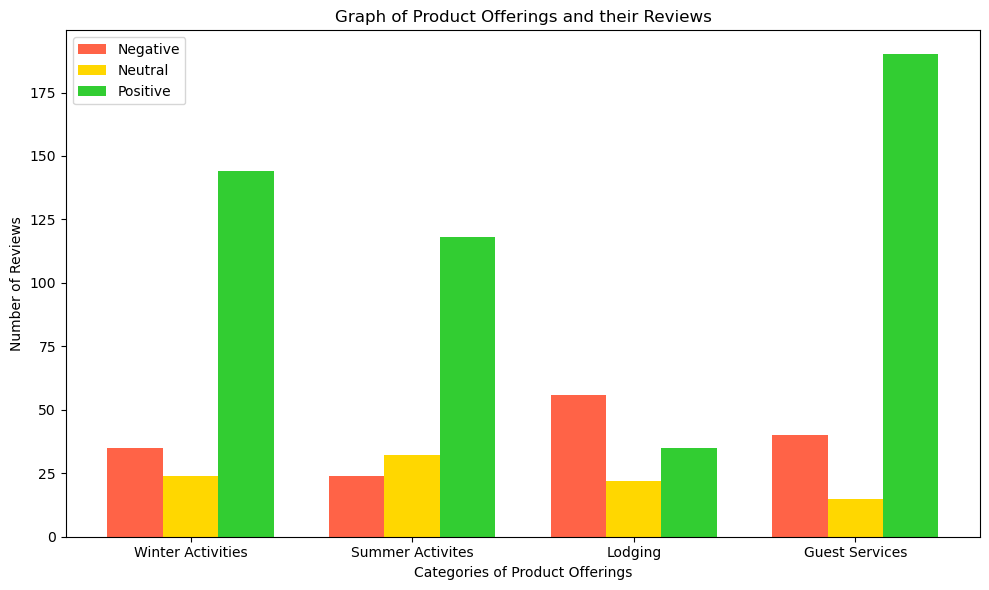

In [16]:
# Grouping variables by category (Negative, Neutral, Positive)
labels = ['Winter Activities', 'Summer Activites', 'Lodging', 'Guest Services']
negative_values = [winter_negative, summer_negative, lodging_negative, guest_services_negative]
neutral_values = [winter_neutral, summer_neutral, lodging_neutral, guest_services_neutral]
positive_values = [winter_positive, summer_positive, lodging_positive, guest_services_positive]

# Set colors for each group
colors = ['#FF6347', '#FFD700', '#32CD32']  # Red for negative, Yellow for neutral, Green for positive

# Bar width
bar_width = 0.25

# Positions of the bars on the x-axis
index = np.arange(len(labels))

# Create the bar chart
plt.figure(figsize=(10, 6))

# Plot each category with different colors
plt.bar(index - bar_width, negative_values, bar_width, color=colors[0], label='Negative')
plt.bar(index, neutral_values, bar_width, color=colors[1], label='Neutral')
plt.bar(index + bar_width, positive_values, bar_width, color=colors[2], label='Positive')

# Add labels and title
plt.xlabel('Categories of Product Offerings')
plt.ylabel('Number of Reviews')
plt.title('Graph of Product Offerings and their Reviews')

# Add category labels
plt.xticks(index, labels)

# Add legend
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()